# Importing Modules

In [1]:
# Import the modules
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


In [2]:
# Load the dataset
df = pd.read_csv('fraud_data.csv')

In [3]:
# To observe the dimensions of the dataset we're dealing with

df.shape

(59054, 434)

In [4]:
# Get insights about the different data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [5]:
# Observe the first 5 rows of the dataset

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the number of columns
num_columns = len(df.columns)

# Print the number of columns
print("Number of columns:", num_columns)

Number of columns: 434


In [7]:
# Get the number of rows
num_rows = len(df)

# Print the number of rows
print("Number of rows:", num_rows)

Number of rows: 59054


In [8]:
# Get the columns with NaN values and their counts
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Print the columns with NaN values and their counts
for column, count in zip(nan_columns, nan_counts):
    print(f"Column '{column}' has {count} NaN values.")

Column 'card2' has 915 NaN values.
Column 'card3' has 158 NaN values.
Column 'card4' has 162 NaN values.
Column 'card5' has 444 NaN values.
Column 'card6' has 159 NaN values.
Column 'addr1' has 6728 NaN values.
Column 'addr2' has 6728 NaN values.
Column 'dist1' has 35353 NaN values.
Column 'dist2' has 55182 NaN values.
Column 'P_emaildomain' has 9410 NaN values.
Column 'R_emaildomain' has 45219 NaN values.
Column 'D1' has 121 NaN values.
Column 'D2' has 27954 NaN values.
Column 'D3' has 26215 NaN values.
Column 'D4' has 16846 NaN values.
Column 'D5' has 30979 NaN values.
Column 'D6' has 51633 NaN values.
Column 'D7' has 55107 NaN values.
Column 'D8' has 51501 NaN values.
Column 'D9' has 51501 NaN values.
Column 'D10' has 7540 NaN values.
Column 'D11' has 28152 NaN values.
Column 'D12' has 52474 NaN values.
Column 'D13' has 52730 NaN values.
Column 'D14' has 52737 NaN values.
Column 'D15' has 8970 NaN values.
Column 'M1' has 27319 NaN values.
Column 'M2' has 27319 NaN values.
Column 'M3

# Data Preparation

In [9]:
# Get the columns with at least 30,000 NaN values
nan_columns = df.columns[df.isna().sum() >= 30000]

# Drop the columns with at least 1000 NaN values
df.drop(nan_columns, axis=1, inplace=True)

# Print the updated DataFrame
df.shape

(59054, 220)

In [10]:
# observing updated first 5 rows

df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.0,0.0,225.500000,0.0,288.0,1707.0,1707.0,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.0,0.0,73.772797,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.0,0.0,99.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# # Get the columns with more than 1000 zeroes
# zero_columns = df.columns[(df == 0).sum() > 30000]

# # Drop the columns with more than 1000 zeroes
# df.drop(zero_columns, axis=1, inplace=True)

# # Print the updated DataFrame
# df.shape

In [12]:
# Get the columns with NaN values and their counts
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Print the columns with NaN values and their counts
for column, count in zip(nan_columns, nan_counts):
    print(f"Column '{column}' has {count} NaN values.")

Column 'card2' has 915 NaN values.
Column 'card3' has 158 NaN values.
Column 'card4' has 162 NaN values.
Column 'card5' has 444 NaN values.
Column 'card6' has 159 NaN values.
Column 'addr1' has 6728 NaN values.
Column 'addr2' has 6728 NaN values.
Column 'P_emaildomain' has 9410 NaN values.
Column 'D1' has 121 NaN values.
Column 'D2' has 27954 NaN values.
Column 'D3' has 26215 NaN values.
Column 'D4' has 16846 NaN values.
Column 'D10' has 7540 NaN values.
Column 'D11' has 28152 NaN values.
Column 'D15' has 8970 NaN values.
Column 'M1' has 27319 NaN values.
Column 'M2' has 27319 NaN values.
Column 'M3' has 27319 NaN values.
Column 'M4' has 28008 NaN values.
Column 'M6' has 17094 NaN values.
Column 'V1' has 28152 NaN values.
Column 'V2' has 28152 NaN values.
Column 'V3' has 28152 NaN values.
Column 'V4' has 28152 NaN values.
Column 'V5' has 28152 NaN values.
Column 'V6' has 28152 NaN values.
Column 'V7' has 28152 NaN values.
Column 'V8' has 28152 NaN values.
Column 'V9' has 28152 NaN valu

In [13]:
# Get the numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Replace NaN values with column means
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [14]:
# Get Remaining columns with NaN values and their counts
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Print the columns with NaN values and their counts
for column, count in zip(nan_columns, nan_counts):
    print(f"Column '{column}' has {count} NaN values.")

Column 'card4' has 162 NaN values.
Column 'card6' has 159 NaN values.
Column 'P_emaildomain' has 9410 NaN values.
Column 'M1' has 27319 NaN values.
Column 'M2' has 27319 NaN values.
Column 'M3' has 27319 NaN values.
Column 'M4' has 28008 NaN values.
Column 'M6' has 17094 NaN values.


In [15]:
# Get the columns with NaN values and their counts
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Get the data types of the columns
column_types = df[nan_columns].dtypes

# Print the columns with NaN values, their counts, and data types
for column, count, dtype in zip(nan_columns, nan_counts, column_types):
    print(f"Column '{column}' has {count} NaN values. Data type: {dtype}")

Column 'card4' has 162 NaN values. Data type: object
Column 'card6' has 159 NaN values. Data type: object
Column 'P_emaildomain' has 9410 NaN values. Data type: object
Column 'M1' has 27319 NaN values. Data type: object
Column 'M2' has 27319 NaN values. Data type: object
Column 'M3' has 27319 NaN values. Data type: object
Column 'M4' has 28008 NaN values. Data type: object
Column 'M6' has 17094 NaN values. Data type: object


In [16]:
nan_columns = df.columns[df.isna().any()]

# Replace NaN values with the mode
for column in nan_columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)



In [17]:
# Get Remaining columns with NaN values and their counts
nan_columns = df.columns[df.isna().any()]
nan_counts = df[nan_columns].isna().sum()

# Print the columns with NaN values and their counts
for column, count in zip(nan_columns, nan_counts):
    print(f"Column '{column}' has {count} NaN values.")

In [18]:
# Check if there are any remaining NaN values
has_nan = df.isnull().values.any()

# Print the result
if has_nan:
    print("There are still NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")

There are no NaN values in the dataset.


In [19]:


# Identify the categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Loop through each categorical feature
for feature in categorical_features:
    # Transform the feature into numerical values
    # Apply feature extraction techniques
    # Perform feature selection methods
    # Learn distributed representations of the categories
    
    # Count the number of occurrences of each category in the feature
    counts = df[feature].value_counts()
    
    # Print the counts
    print(f"Counts for {feature}:")
    print(counts)


Counts for ProductCD:
ProductCD
W    43840
C     7003
R     3758
H     3284
S     1169
Name: count, dtype: int64
Counts for card4:
card4
visa                38505
mastercard          19042
american express      831
discover              676
Name: count, dtype: int64
Counts for card6:
card6
debit              44286
credit             14764
debit or credit        3
charge card            1
Name: count, dtype: int64
Counts for P_emaildomain:
P_emaildomain
gmail.com           32327
yahoo.com            9989
hotmail.com          4532
anonymous.com        3766
aol.com              2842
comcast.net           785
icloud.com            628
outlook.com           495
att.net               418
msn.com               412
sbcglobal.net         299
live.com              294
verizon.net           278
ymail.com             230
bellsouth.net         192
yahoo.com.mx          168
me.com                148
cox.net               115
optonline.net          87
live.com.mx            82
charter.net            

In [20]:
# # Dropping Columns with all zeroes

# # Drop the specified columns
# columns_to_drop = ['V321', 'V320', 'V319']
# df = df.drop(columns_to_drop, axis=1)

# # Use the modified DataFrame for further analysis or modeling

# for column in columns_to_drop:

#     are_all_zeroes = (df[column_name] == 0).all()

# # Print the result
# if are_all_zeroes:
#     print("All entries in '{}' column are zeroes.".format(column_name))
# else:
#     print("Not all entries in '{}' column are zeroes.".format(column_name))

# # Check how many entries in a specific column are zeroes
# import pandas as pd

# # Read the dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# # Check how many entries in multiple columns are zeroes
# columns_to_check = ['V321', 'V320', 'V319']
# num_zero_entries = (df[columns_to_check] == 0).all(axis=1).sum()

# # Print the result
# print("Number of zero entries across the specified columns: ", num_zero_entries)

In [21]:
# Check for duplicates
duplicates = df.duplicated()

# Print the result
if duplicates.any():
    print("There are duplicates in the dataset.")
else:
    print("There are no duplicates in the dataset.")

There are no duplicates in the dataset.


In [22]:
df.shape

(59054, 220)

# Data Visualization

In [23]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.0,0.0,225.500000,0.0,288.0,1707.0,1707.0,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.0,0.0,73.772797,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.0,0.0,99.900002,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
59049,3549150,0,14898396,335.00,W,2616,327.0,150.0,discover,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59050,3497600,0,13371647,20.95,W,3277,111.0,150.0,visa,226.0,...,47.950001,47.950001,138.850006,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0
59051,3575755,0,15775109,59.00,W,9486,127.0,150.0,mastercard,224.0,...,0.000000,49.000000,49.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59052,3521246,0,14071016,25.95,W,2392,360.0,150.0,mastercard,126.0,...,25.950001,25.950001,25.950001,25.950001,51.900002,51.900002,51.900002,0.0,0.0,0.0
59053,3483662,0,13012549,59.00,W,10112,360.0,150.0,visa,166.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


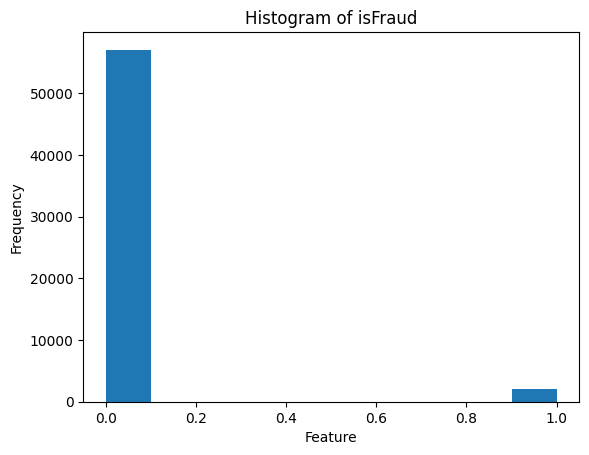

In [25]:
# Histogram distribtution of isFraud

feature = df['isFraud']

# Create a histogram
plt.hist(feature, bins=10)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud')

# Display the plot
plt.show()

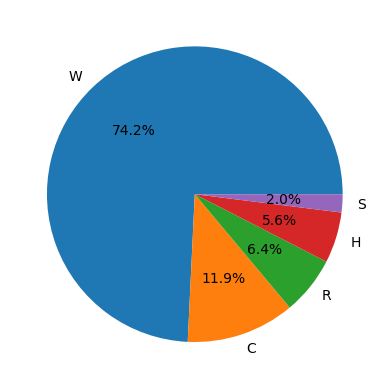

In [26]:
# Pie Chart for ProductCD

top10 = df['ProductCD'].value_counts()[:10]
plt.pie(top10, labels=top10.index, autopct="%1.1f%%")
plt.show()

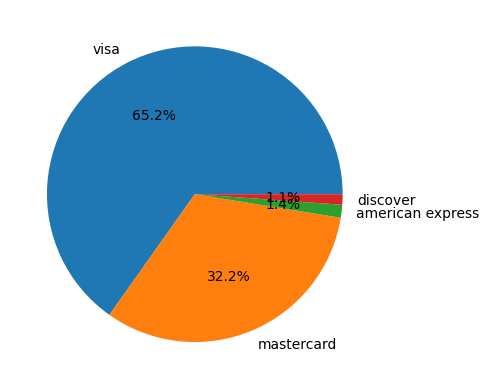

In [27]:
# Pie Chart view for card4

top10 = df['card4'].value_counts()[:10]
plt.pie(top10, labels=top10.index, autopct="%1.1f%%")
plt.show()

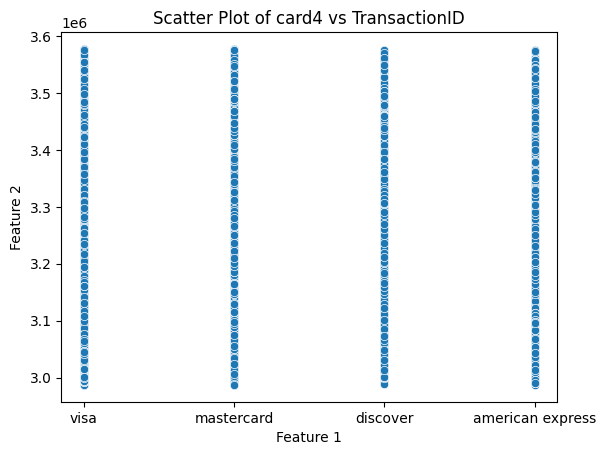

In [28]:
# Visualizing the Distribution of TransactionID and card4
feature1 = df['card4']
feature2 = df['TransactionID']

# Create a scatter plot using Seaborn
sns.scatterplot(x=feature1, y=feature2)

# Set labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of card4 vs TransactionID')

# Display the plot
plt.show()

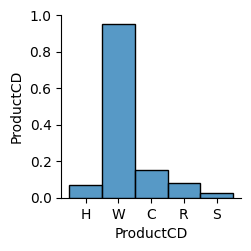

In [29]:
# Create a pair plot for the 'my_feature' feature
sns.pairplot(df, vars=['ProductCD'])

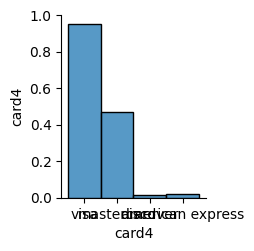

In [30]:
# Create a pair plot for the 'my_feature' feature
sns.pairplot(df, vars=['card4'])

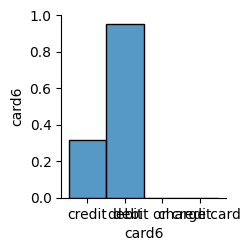

In [31]:
# Create a pair plot for the 'my_feature' feature
sns.pairplot(df, vars=['card6'])

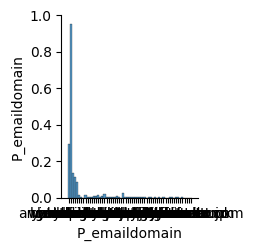

In [32]:
# Create a pair plot for the 'my_feature' feature
sns.pairplot(df, vars=['P_emaildomain'])

# Data Preprocessing

In [33]:
# Handling Undersampling in isFraud

# Separate the majority and minority classes
majority_class = df[df['isFraud'] == 0]
minority_class = df[df['isFraud'] == 1]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                replace=False,  # set to False for undersampling
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # for reproducibility

# Combine the undersampled majority class with the minority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Use the undersampled dataset for further analysis or modeling

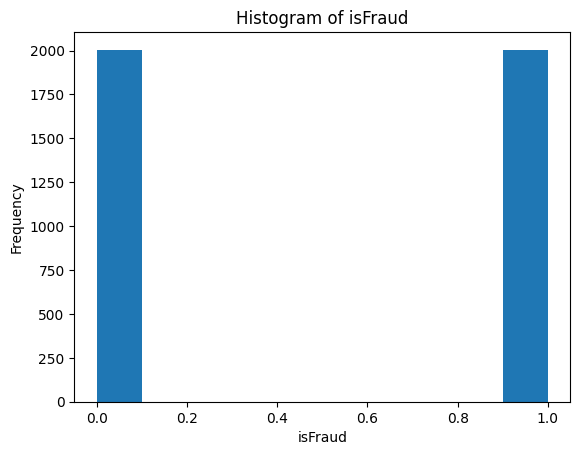

In [34]:
# New Histogram distribtution of isFraud
feature = undersampled_df['isFraud']

# Create a histogram
plt.hist(feature, bins=10)  # Adjust the number of bins as needed

# Set labels and title
plt.xlabel('isFraud')
plt.ylabel('Frequency')
plt.title('Histogram of isFraud')

# Display the plot
plt.show()

In [35]:
# Assign the features and the label to separate variables

X = df.drop("isFraud", axis=1) # Drop the label column and assign the rest to X
y = df.loc[:, "isFraud"] # Select the label column and assign it to y
feature_names = X.columns # Get the names of the feature columns


In [36]:
# Encode the categorical variables with one-hot encoding

X = pd.get_dummies(X)

In [37]:
#Scaling the numerical variables with min-max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [38]:
# Splitting data into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building 

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [46]:
# Evaluate the performance of the model
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

y_pred_proba = dtree.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)

print("The AUC score :", auc_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 score:", f1)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

The AUC score : 0.5721616690320424
Accuracy: 0.9690692555172997
Precision: 0.7672413793103449
F1 score: 0.24517906336088152
Mean squared error: 0.03093074448270023
Mean absolute error: 0.03093074448270023
R2 score: 0.06960567383498473


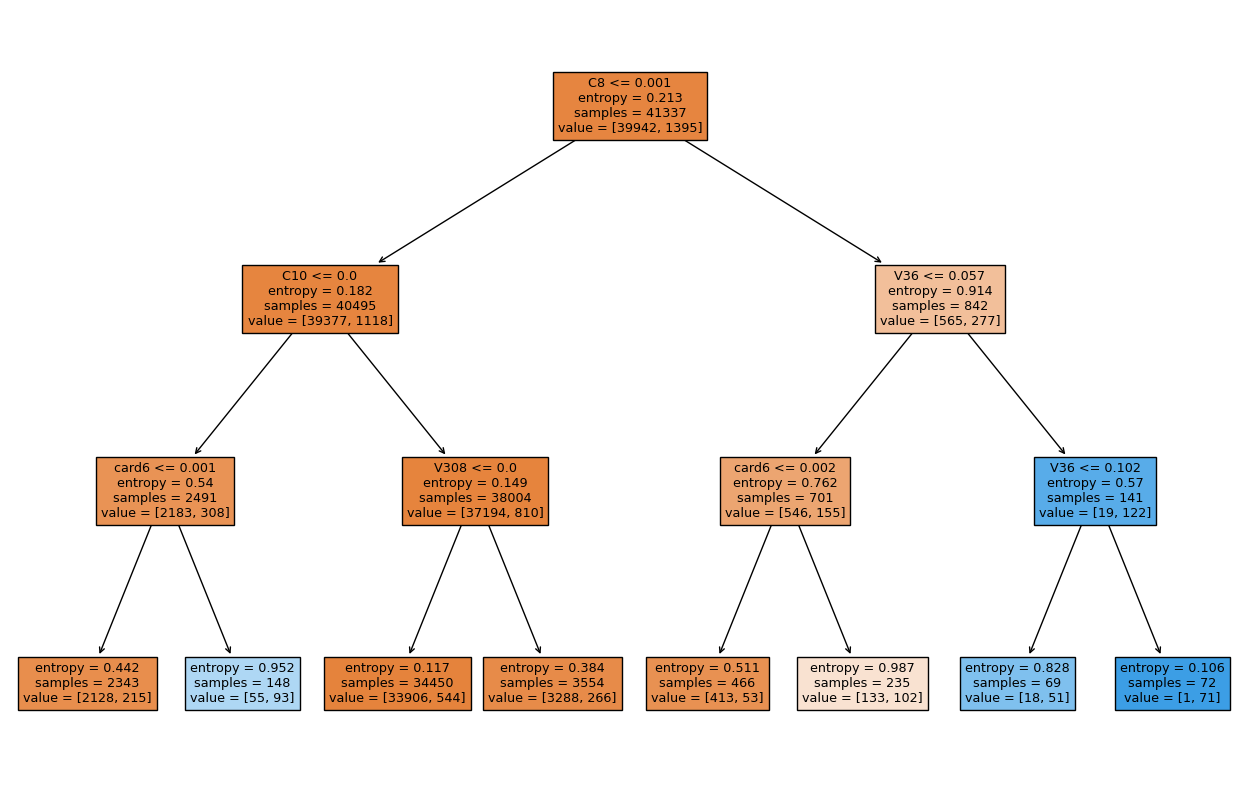

In [41]:
# Visualize the tree structure
plt.figure(figsize=(16, 10))
plot_tree(dtree, feature_names=feature_names, filled=True)
plt.show()


C:\Users\Developer.DESKTOP-TQR2S2O\AppData\Local\Temp\ipykernel_15124\3117833557.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins=20)


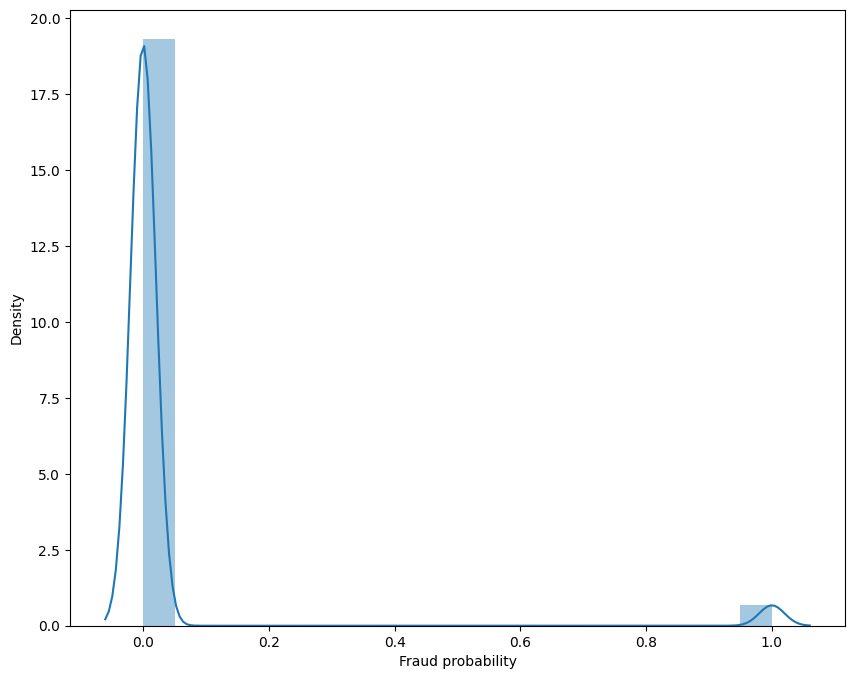

In [43]:
# Visualize the data distribution
plt.figure(figsize=(10,8))
sns.distplot(y, bins=20)
plt.xlabel("Fraud probability")
plt.ylabel("Density")
plt.show()